In [ ]:
# Install Packages
packages <- c("dplyr", "fixest", "did", "didimputation",
              "panelView", "ggplot2", "bacondecomp", "HonestDiD",
              "DIDmultiplegtDYN", "PanelMatch")
install.packages(setdiff(packages, rownames(installed.packages())))

if ("fect" %in% rownames(installed.packages()) == FALSE) {
  devtools:: install_github("xuyiqing/fect")
}
if ("HonestDiDFEct" %in% rownames(installed.packages()) == FALSE) {
  devtools:: install_github("lzy318/HonestDiDFEct")
}


In [6]:

# Load Libraries
library(dplyr)
# library(readstata13)
library(fixest)
library(did)
library(fect)
library(panelView)
# library(PanelMatch)
library(ggplot2)
library(bacondecomp)
library(didimputation)
library(doParallel)
# library(HonestDiD)
# library(HonestDiDFEct)
library(DIDmultiplegtDYN)


,bfs,year,nat_rate_ord,indirect
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1991,0.000000,0
2,1,1992,0.000000,0
3,1,1993,0.000000,0
4,1,1994,3.448276,0
5,1,1995,0.000000,0
6,1,1996,0.000000,0


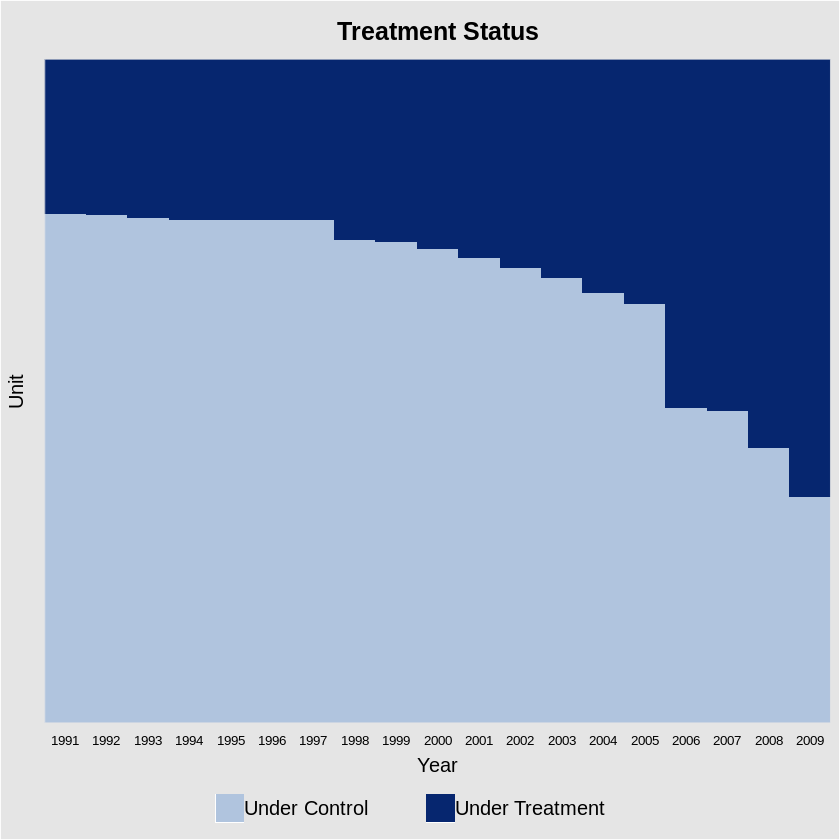

In [7]:

# Data
data(fect)
data <- hh2019
head(data)

# Panel View
panelview(nat_rate_ord ~ indirect, data = data, index = c("bfs","year"),
  xlab = "Year", ylab = "Unit", display.all = T,
  gridOff = TRUE, by.timing = TRUE)


Number of unique treatment histories: 17


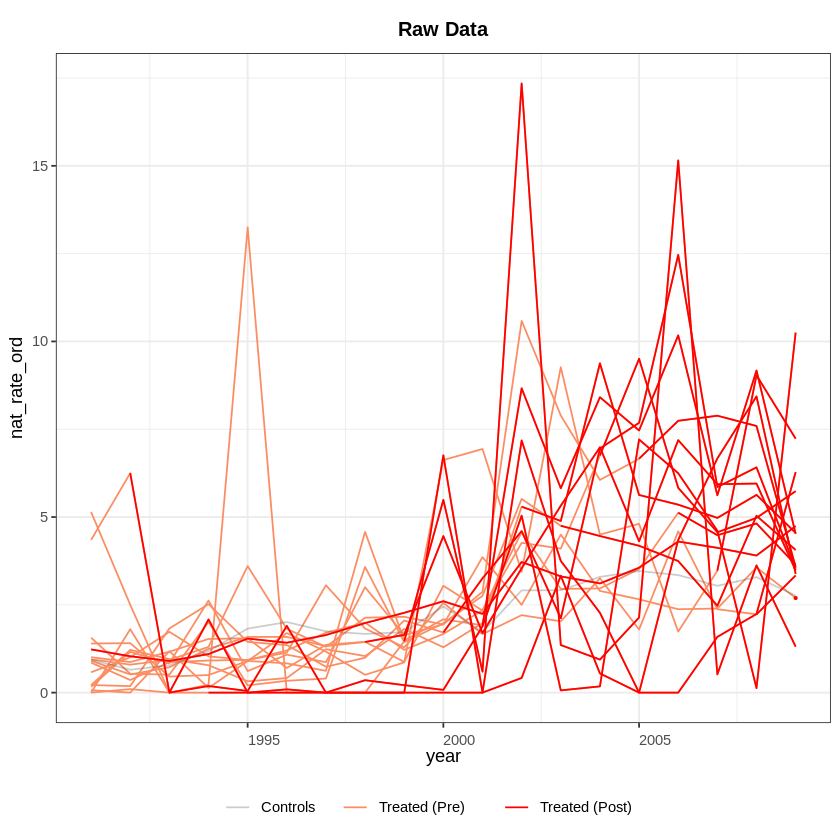

In [8]:

panelview(data = data,Y='nat_rate_ord',
          D='indirect',index=c("bfs","year"),
          by.timing = TRUE, display.all = TRUE,
          type = "outcome", by.cohort = TRUE)

In [9]:

# TWFE
model.twfe.0 <- feols(nat_rate_ord~indirect|bfs+year,
                      data=data, cluster = "bfs")
print(model.twfe.0)

# Bacon Decomposition
data.complete <- data[which(!is.na(data$nat_rate_ord)),]

OLS estimation, Dep. Var.: nat_rate_ord
Observations: 22,971
Fixed-effects: bfs: 1,209,  year: 19
Standard-errors: Clustered (bfs) 
         Estimate Std. Error t value   Pr(>|t|)    
indirect  1.33932   0.186525 7.18039 1.2117e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 4.09541     Adj. R2: 0.152719
                Within R2: 0.005173


                      type  weight avg_est
1 Earlier vs Later Treated 0.17605 1.97771
2  Later vs Always Treated 0.31446 0.75233
3 Later vs Earlier Treated 0.05170 0.32310
4     Treated vs Untreated 0.45779 1.61180
                   Group.1          x
1 Earlier vs Later Treated 0.34817362
2  Later vs Always Treated 0.23657303
3 Later vs Earlier Treated 0.01670477
4     Treated vs Untreated 0.73787343


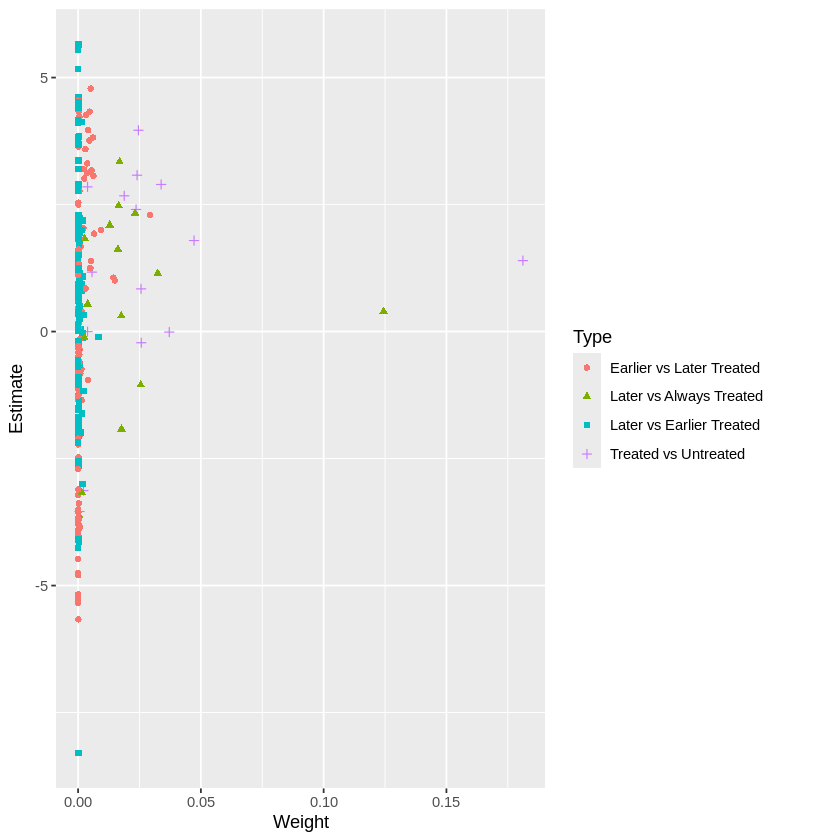

In [10]:
df_bacon <- bacon(nat_rate_ord~indirect,
                  data = data.complete,
                  id_var = "bfs",
                  time_var = "year")
ggplot(df_bacon) +
   aes(x = weight, y = estimate, shape = factor(type), color = factor(type)) +
   labs(x = "Weight", y = "Estimate", shape = "Type", color = 'Type') +
   geom_point()
print(aggregate(df_bacon$estimate * df_bacon$weight,
                list(df_bacon$type), FUN=sum))


OLS estimation, Dep. Var.: nat_rate_ord
Observations: 17,594
Fixed-effects: bfs: 926,  year: 19
Standard-errors: Clustered (bfs) 
         Estimate Std. Error t value  Pr(>|t|)    
indirect  1.60858   0.195296 8.23661 6.009e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 4.43613     Adj. R2: 0.143692
                Within R2: 0.007415


,bfs,year,nat_rate_ord,indirect,FirstTreat,Cohort,Time_to_Treatment
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,1991,0.000000,0,2006,Cohort:2006,-15
2,1,1992,0.000000,0,2006,Cohort:2006,-14
3,1,1993,0.000000,0,2006,Cohort:2006,-13
4,1,1994,3.448276,0,2006,Cohort:2006,-12
5,1,1995,0.000000,0,2006,Cohort:2006,-11
6,1,1996,0.000000,0,2006,Cohort:2006,-10
7,1,1997,0.000000,0,2006,Cohort:2006,-9
8,1,1998,0.000000,0,2006,Cohort:2006,-8
9,1,1999,0.000000,0,2006,Cohort:2006,-7


                             Estimate Std. Error t value Pr(>|t|)
Time_to_Treatment::-18:treat   -0.321      0.633  -0.507    0.612
Time_to_Treatment::-17:treat   -0.119      0.391  -0.303    0.762
Time_to_Treatment::-16:treat   -0.396      0.403  -0.982    0.326
Time_to_Treatment::-15:treat   -0.411      0.344  -1.195    0.232
Time_to_Treatment::-14:treat    0.245      0.369   0.662    0.508
Time_to_Treatment::-13:treat   -0.044      0.354  -0.125    0.900
Time_to_Treatment::-12:treat   -0.546      0.315  -1.732    0.084
Time_to_Treatment::-11:treat   -0.293      0.347  -0.845    0.398
Time_to_Treatment::-10:treat   -0.424      0.319  -1.328    0.185
Time_to_Treatment::-9:treat    -0.467      0.301  -1.552    0.121
Time_to_Treatment::-8:treat    -0.116      0.334  -0.347    0.729
Time_to_Treatment::-7:treat    -0.724      0.306  -2.369    0.018
Time_to_Treatment::-6:treat    -0.573      0.317  -1.807    0.071
Time_to_Treatment::-5:treat    -0.555      0.309  -1.795    0.073
Time_to_Tr

Column 'CI.lower' not found in input data. Calculating values for 'CI.lower' using 'Estimate' and 'Std. Error'.

Column 'CI.upper' not found in input data. Calculating values for 'CI.upper' using 'Estimate' and 'Std. Error'.

Column 'CI.lower' not found in input data. Calculating values for 'CI.lower' using 'Estimate' and 'Std. Error'.

Column 'CI.upper' not found in input data. Calculating values for 'CI.upper' using 'Estimate' and 'Std. Error'.



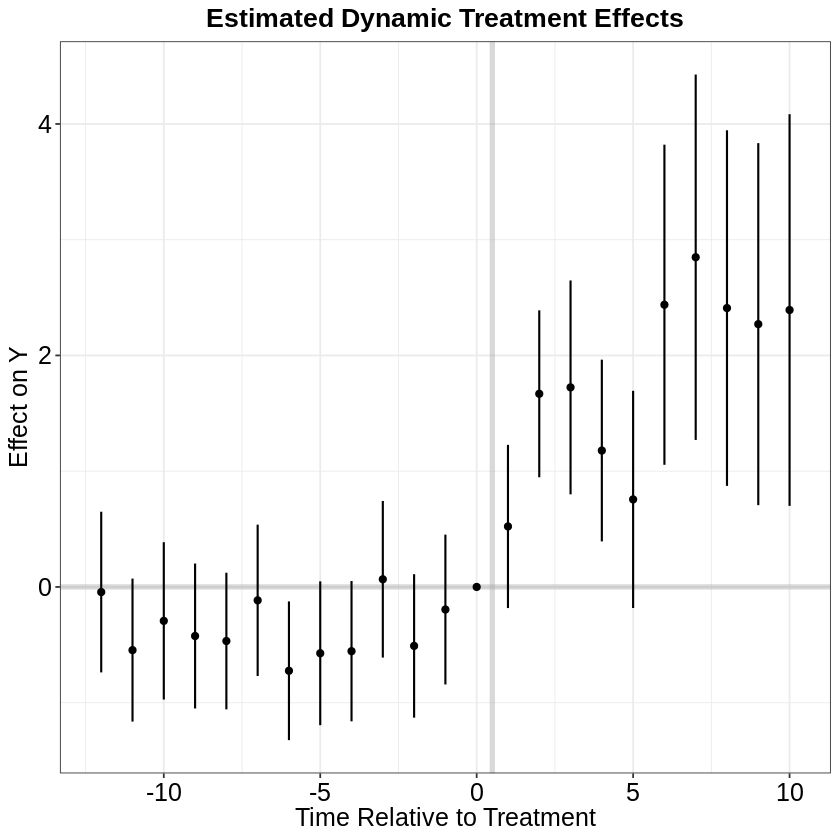

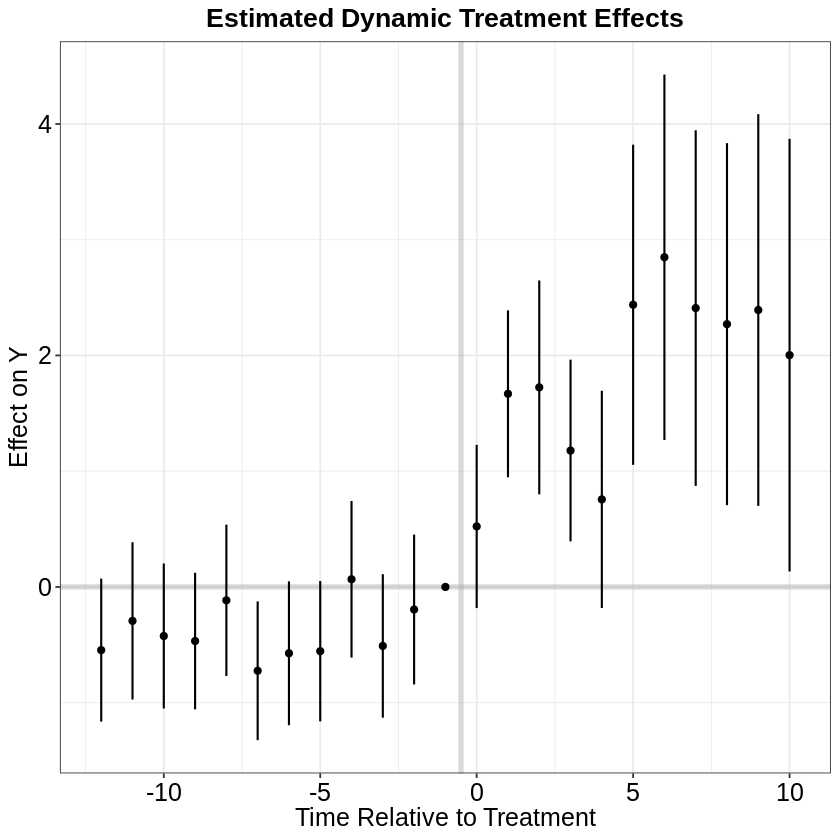

In [11]:

# Remove always treated units
df <- as.data.frame(data %>%
                      group_by(bfs) %>%
                      mutate(treatment_mean = mean(indirect,na.rm = TRUE)))
df.use <- df[which(df$treatment_mean<1),]
model.twfe.1 <- feols(nat_rate_ord~indirect|bfs+year,
                      data=df.use, cluster = "bfs")
print(model.twfe.1)

# Cohort & Event Study
df.use <- get.cohort(df.use, D = "indirect", index=c("bfs","year"),
                     start0 = TRUE)
head(df.use[,-5],19)

# Dynamic TWFE
df.twfe <- df.use
df.twfe$treat <- as.numeric(df.twfe$treatment_mean>0)
df.twfe[which(is.na(df.twfe$Time_to_Treatment)),'Time_to_Treatment'] <- 0
twfe.est <- feols(nat_rate_ord ~ i(Time_to_Treatment, treat, ref = -1)| bfs + year,
                  data = df.twfe, cluster = "bfs")
twfe.output <- as.matrix(twfe.est$coeftable)
print(round(twfe.output, 3))

twfe.output <- as.data.frame(twfe.output)
twfe.output$Time <- c(c(-18:-2),c(0:17))+1
p.twfe <- esplot(twfe.output,Period = 'Time',Estimate = 'Estimate',
                               SE = 'Std. Error', xlim = c(-12,10))
p.twfe

twfe.output <- as.data.frame(twfe.est$coeftable)
twfe.output$Time <- c(c(-18:-2),c(0:17))
p.twfe <- esplot(twfe.output, Period = 'Time',
                 Estimate = 'Estimate', SE = 'Std. Error',
                 xlim = c(-12,10),start0 = TRUE)
p.twfe

OLS estimation, Dep. Var.: nat_rate_ord
Observations: 17,594
Fixed-effects: bfs: 926,  year: 19
Standard-errors: Clustered (bfs) 
    Estimate Std. Error t value   Pr(>|t|)    
ATT   1.3309   0.287971 4.62163 4.3474e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 4.34795     Adj. R2: 0.163888
                Within R2: 0.046484

Column 'CI.lower' not found in input data. Calculating values for 'CI.lower' using 'Estimate' and 'Std. Error'.

Column 'CI.upper' not found in input data. Calculating values for 'CI.upper' using 'Estimate' and 'Std. Error'.



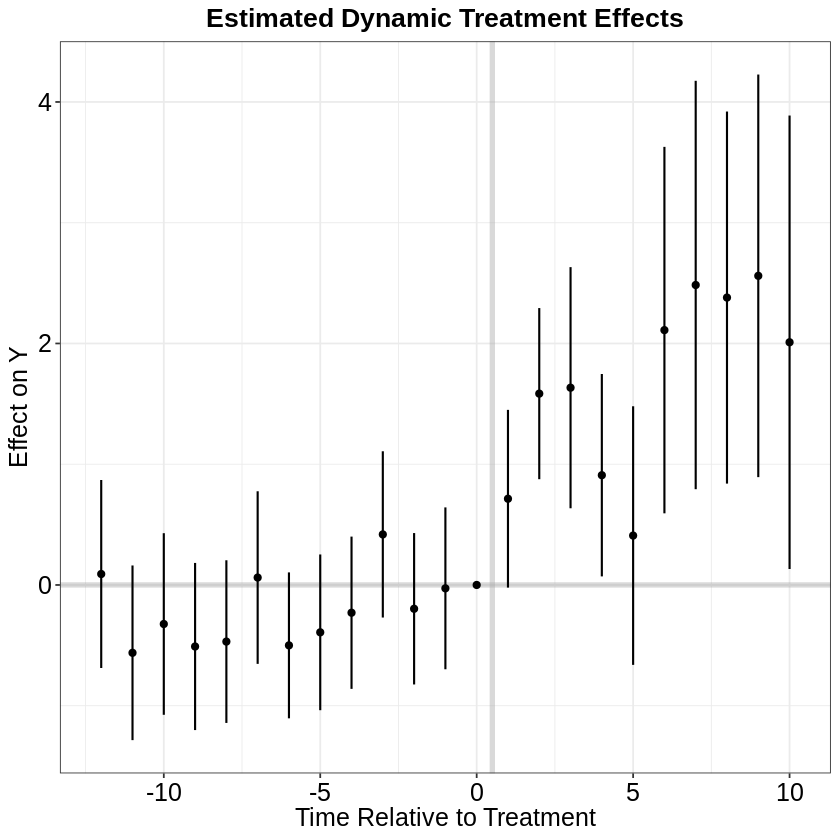

In [12]:

# Interaction Weighted
df.sa <- df.use
df.sa[which(is.na(df.sa$FirstTreat)),"FirstTreat"] <- 1000
model.sa.1 <- feols(nat_rate_ord~sunab(FirstTreat,year)|bfs+year,
                    data = df.sa, cluster = "bfs")
summary(model.sa.1,agg = "ATT")

sa.output <- as.data.frame(as.matrix(model.sa.1$coeftable))
sa.output$Time <- c(c(-18:-2),c(0:17)) + 1
p.sa <- esplot(sa.output,Period = 'Time',Estimate = 'Estimate',
                             SE = 'Std. Error', xlim = c(-12,10))
p.sa


Warning message in pre_process_did(yname = yname, tname = tname, idname = idname, :
“Be aware that there are some small groups in your dataset.
  Check groups: 1992,1993,1999.”
Warning message in att_gt(yname = "nat_rate_ord", gname = "FirstTreat", idname = "bfs", :
“Not returning pre-test Wald statistic due to singular covariance matrix”



Call:
aggte(MP = cs.est.1, type = "simple", na.rm = T, bstrap = F)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


    ATT    Std. Error     [ 95%  Conf. Int.]  
 1.3309        0.3019     0.7392      1.9226 *


---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Outcome Regression

Call:
aggte(MP = cs.est.1, type = "dynamic", na.rm = T, bstrap = FALSE, 
    cband = FALSE)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on event-study/dynamic aggregation:  

Column 'CI.lower' not found in input data. Calculating values for 'CI.lower' using 'Estimate' and 'SE'.

Column 'CI.upper' not found in input data. Calculating values for 'CI.upper' using 'Estimate' and 'SE'.

Warning message in pre_process_did(yname = yname, tname = tname, idname = idname, :
“Be aware that there are some small groups in your dataset.
  Check groups: 1992,1993,1999.”
Warning message in att_gt(yname = "nat_rate_ord", gname = "FirstTreat", idname = "bfs", :
“Not returning pre-test Wald statistic due to singular covariance matrix”
Column 'CI.lower' not found in input data. Calculating values for 'CI.lower' using 'Estimate' and 'SE'.

Column 'CI.upper' not found in input data. Calculating values for 'CI.upper' using 'Estimate' and 'SE'.



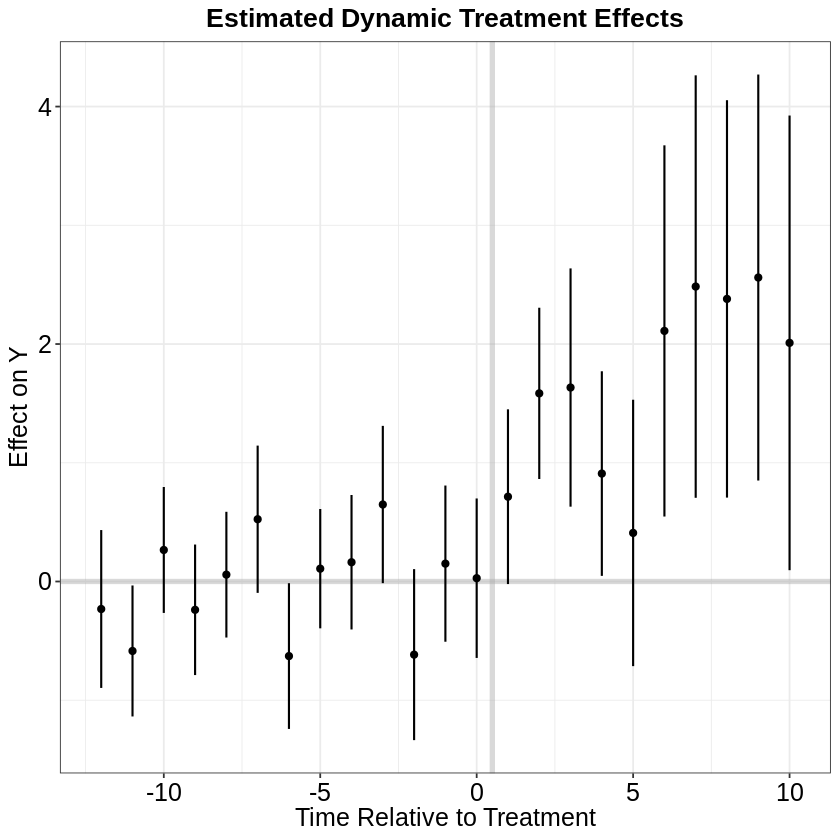

Warning message in pre_process_did(yname = yname, tname = tname, idname = idname, :
“Be aware that there are some small groups in your dataset.
  Check groups: 1992,1993,1999.”



Call:
aggte(MP = cs.est.2, type = "simple", na.rm = T, bstrap = F)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


    ATT    Std. Error     [ 95%  Conf. Int.]  
 1.2923         0.308     0.6886       1.896 *


---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Not Yet Treated,  Anticipation Periods:  0
Estimation Method:  Outcome Regression


Warning message in pre_process_did(yname = yname, tname = tname, idname = idname, :
“Be aware that there are some small groups in your dataset.
  Check groups: 1992,1993,1999.”
Column 'CI.lower' not found in input data. Calculating values for 'CI.lower' using 'Estimate' and 'SE'.

Column 'CI.upper' not found in input data. Calculating values for 'CI.upper' using 'Estimate' and 'SE'.



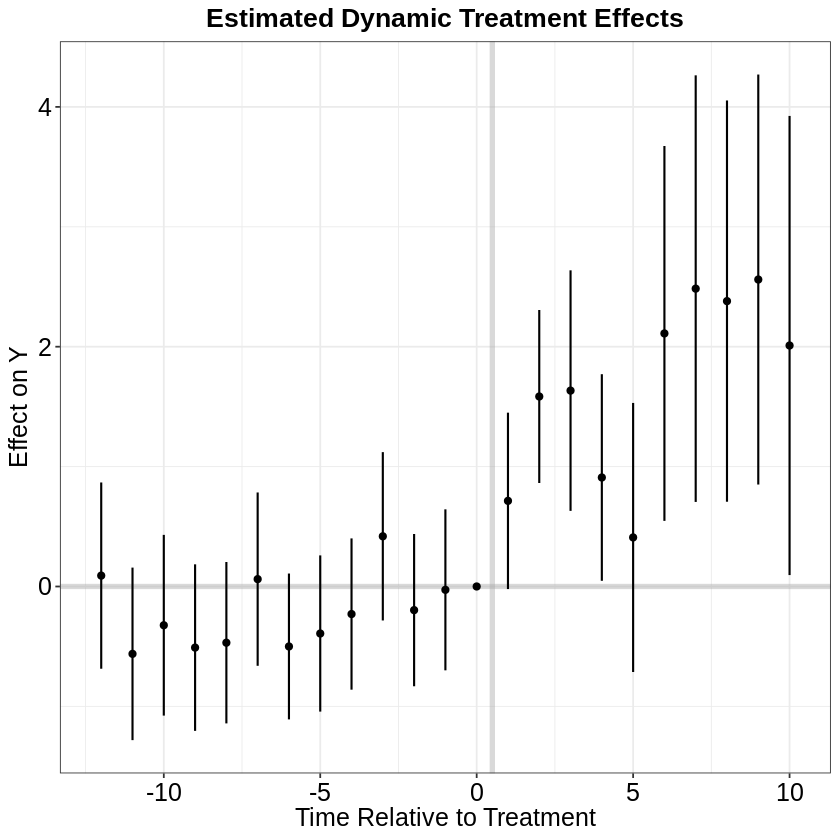

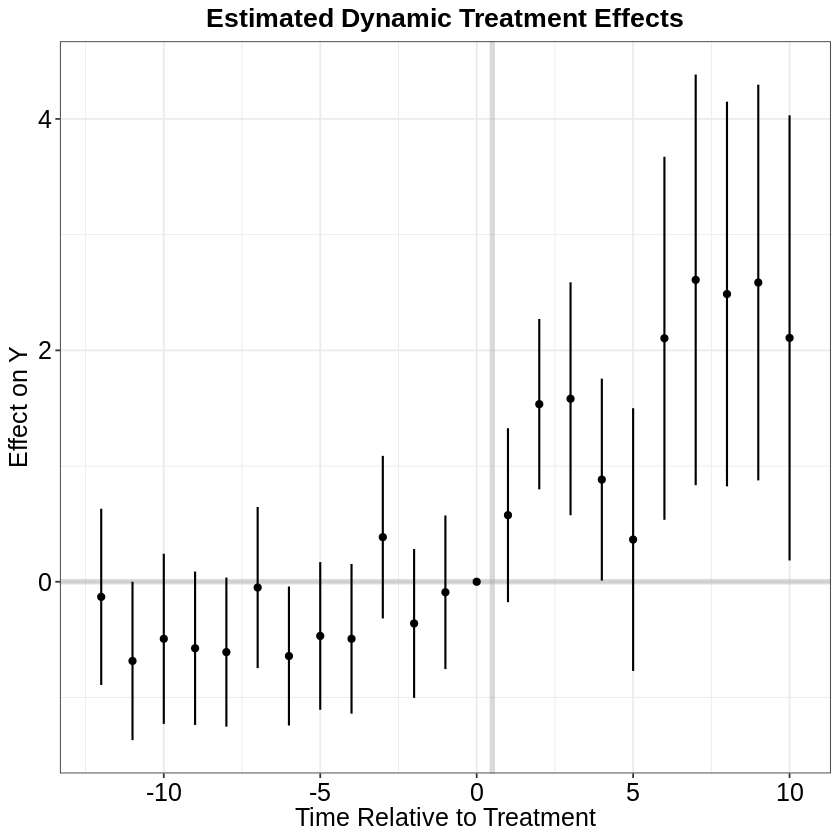

In [13]:

# CSDID
df.cs <- df.use
df.cs[which(is.na(df.cs$FirstTreat)),"FirstTreat"] <- 0
cs.est.1 <- att_gt(yname = "nat_rate_ord",
                 gname = "FirstTreat",
                 idname = "bfs",
                 tname = "year",
                 xformla = ~1,
                 control_group = "nevertreated",
                 allow_unbalanced_panel = TRUE,
                 data = df.cs,
                 est_method = "reg")
cs.est.att.1 <- aggte(cs.est.1, type = "simple", na.rm=T, bstrap = F)
print(cs.est.att.1)

cs.att.1 <- aggte(cs.est.1, type = "dynamic",
                  bstrap=FALSE, cband=FALSE, na.rm=T)
print(cs.att.1)

cs.output <- cbind.data.frame(Estimate = cs.att.1$att.egt,
                              SE = cs.att.1$se.egt,
                              time = cs.att.1$egt + 1)
p.cs.1 <- esplot(cs.output,Period = 'time',Estimate = 'Estimate',
                               SE = 'SE', xlim = c(-12,10))
p.cs.1

cs.est.1.u <- att_gt(yname = "nat_rate_ord",
                 gname = "FirstTreat",
                 idname = "bfs",
                 tname = "year",
                 xformla = ~1,
                 control_group = "nevertreated",
                 allow_unbalanced_panel = TRUE,
                 data = df.cs,
                 est_method = "reg",
                 base_period = "universal")
cs.att.1.u <- aggte(cs.est.1.u, type = "dynamic",
                    bstrap=FALSE, cband=FALSE, na.rm=T)
cs.output.u <- cbind.data.frame(Estimate = cs.att.1.u$att.egt,
                                SE = cs.att.1.u$se.egt,
                                time = cs.att.1.u$egt + 1)
p.cs.1.u <- esplot(cs.output.u,Period = 'time',Estimate = 'Estimate',
                               SE = 'SE', xlim = c(-12,10))
p.cs.1.u

cs.est.2 <- att_gt(yname = "nat_rate_ord",
                   gname = "FirstTreat",
                   idname = "bfs",
                   tname = "year",
                   xformla = ~1,
                   control_group = "notyettreated",
                   allow_unbalanced_panel = TRUE,
                   data = df.cs,
                   est_method = "reg")
cs.est.att.2 <- aggte(cs.est.2, type = "simple",na.rm=T, bstrap = F)
print(cs.est.att.2)

cs.est.2.u <- att_gt(yname = "nat_rate_ord", gname = "FirstTreat",
                     idname = "bfs", tname = "year", xformla = ~1,
                     control_group = "notyettreated",
                     allow_unbalanced_panel = TRUE,
                     data = df.cs, est_method = "reg",
                     base_period = "universal")
cs.att.2.u <- aggte(cs.est.2.u, type = "dynamic",
                    bstrap=FALSE, cband=FALSE, na.rm=T)
cs.output.u <- cbind.data.frame(Estimate = cs.att.2.u$att.egt,
                                SE = cs.att.2.u$se.egt,
                                time = cs.att.2.u$egt + 1)
p.cs.2.u <- esplot(cs.output.u,Period = 'time',Estimate = 'Estimate',
                               SE = 'SE', xlim = c(-12,10))
p.cs.2.u

OLS estimation, Dep. Var.: nat_rate_ord
Observations: 127,186
Fixed-effects: st_unit: 6,694,  st_year: 285
Standard-errors: Clustered (st_unit) 
         Estimate Std. Error t value  Pr(>|t|)    
indirect  1.66861    0.18237 9.14958 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 3.9095     Adj. R2: 0.130512
               Within R2: 0.001783


The variable 'Time_to_Treatment::1000:treat' has been removed because of collinearity (see $collin.var).

Column 'CI.lower' not found in input data. Calculating values for 'CI.lower' using 'Estimate' and 'Std. Error'.

Column 'CI.upper' not found in input data. Calculating values for 'CI.upper' using 'Estimate' and 'Std. Error'.



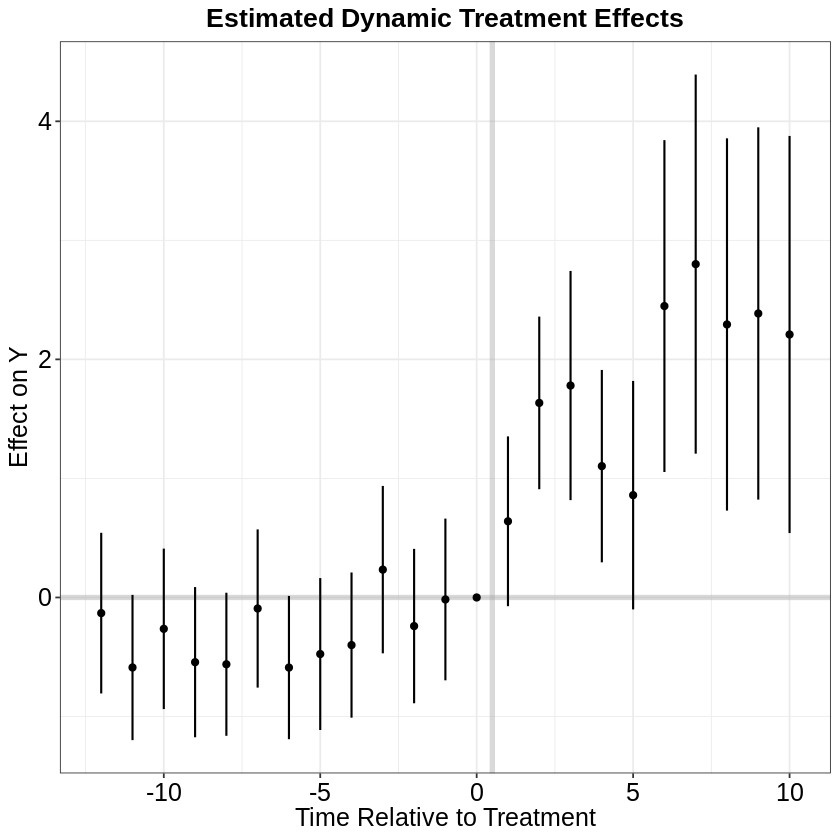

In [14]:


# Stacked DID
df.st <- NULL
target.cohorts <- setdiff(unique(df.use$Cohort),"Control")
k <- 1
for(cohort in target.cohorts){
  df.sub <- df.use[which(df.use$Cohort%in%c(cohort,"Control")),]
  df.sub$stack <- k
  df.st <- rbind(df.st,df.sub)
  k <- k + 1
}
df.st$st_unit <- as.numeric(factor(paste0(df.st$stack,'-',df.st$bfs)))
df.st$st_year <- as.numeric(factor(paste0(df.st$stack,'-',df.st$year)))
model.st <- feols(nat_rate_ord~indirect|st_unit+st_year,
                  data=df.st, cluster = "st_unit")
print(model.st)

df.st$treat <- as.numeric(df.st$treatment_mean>0)
df.st[which(is.na(df.st$Time_to_Treatment)),'Time_to_Treatment'] <- 1000
st.est <- feols(nat_rate_ord ~
                  i(Time_to_Treatment, treat, ref = -1)| st_unit +
                  st_year,data = df.st,cluster = "st_unit")
st.output <- as.data.frame(st.est$coeftable)
st.output$Time <- c(c(-18:-2),c(0:17))+1
p.st <- esplot(st.output,Period = 'Time',Estimate = 'Estimate',
                               SE = 'Std. Error', xlim = c(-12,10))
p.st



In [ ]:

# DIDmultiple
didm.results <- did_multiplegt_dyn(
      df = df.use,
      outcome = "nat_rate_ord",
      group = "bfs",
      controls = NULL,
      time = "year",
      treatment = "indirect",
      effects = 12,
      placebo = 9,
      cluster = "bfs",
      graph_off = TRUE
    )
print(didm.results)

T.post <- dim(didm.results$results$Effects)[1]
T.pre <- dim(didm.results$results$Placebos)[1]
didm.vis <- rbind(didm.results$results$Placebos,didm.results$results$Effects)
didm.vis <- as.data.frame(didm.vis)
didm.vis[,'Time'] <- c(c(-1:-(T.pre)),c(1:T.post))
est.dynamic <- didm.vis[,c(9,1,2,3,4)]
colnames(est.dynamic) <- c("T","estimate","se","lb","ub")
p.didm <- esplot(est.dynamic,Period = 'T',Estimate = 'estimate',
                               SE = 'se', xlim = c(-9, 9))
p.didm

